In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

data = pd.read_csv('datasets/data_final.csv')

data.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,...,Income_Growth_Rate,Budget_Adjustments,Expected_ROI,Healthcare_Cost,Debt,Savings_Rate,Desired_Expenses,Inflation_Rate,Retirement_Age,Life_Expectancy
0,56.0,Master's,Technology,5.0,Urban,21.0,Married,Full-time,7.0,Own,...,0.07,0.05,42767.41,8906.10,10591.14,28457.33,24527.93,2.35,63.0,84.0
1,69.0,High School,Finance,0.0,Urban,4.0,Single,Full-time,7.0,Own,...,0.03,0.06,25744.66,18772.34,5510.80,29700.21,44334.32,2.35,63.0,82.0
2,46.0,Bachelor's,Technology,1.0,Urban,1.0,Single,Full-time,7.0,Own,...,0.08,0.09,83321.10,9642.46,16686.02,22181.83,33326.02,2.35,63.0,83.0
3,32.0,High School,Others,2.0,Urban,32.0,Married,Full-time,1.0,Own,...,0.09,0.08,59217.72,11004.45,25942.06,11428.21,42327.27,2.35,63.0,83.0
4,60.0,Bachelor's,Finance,3.0,Urban,15.0,Married,Self-employed,4.0,Own,...,0.07,0.07,350192.33,85179.41,107779.85,232062.93,221683.44,2.35,63.0,83.0


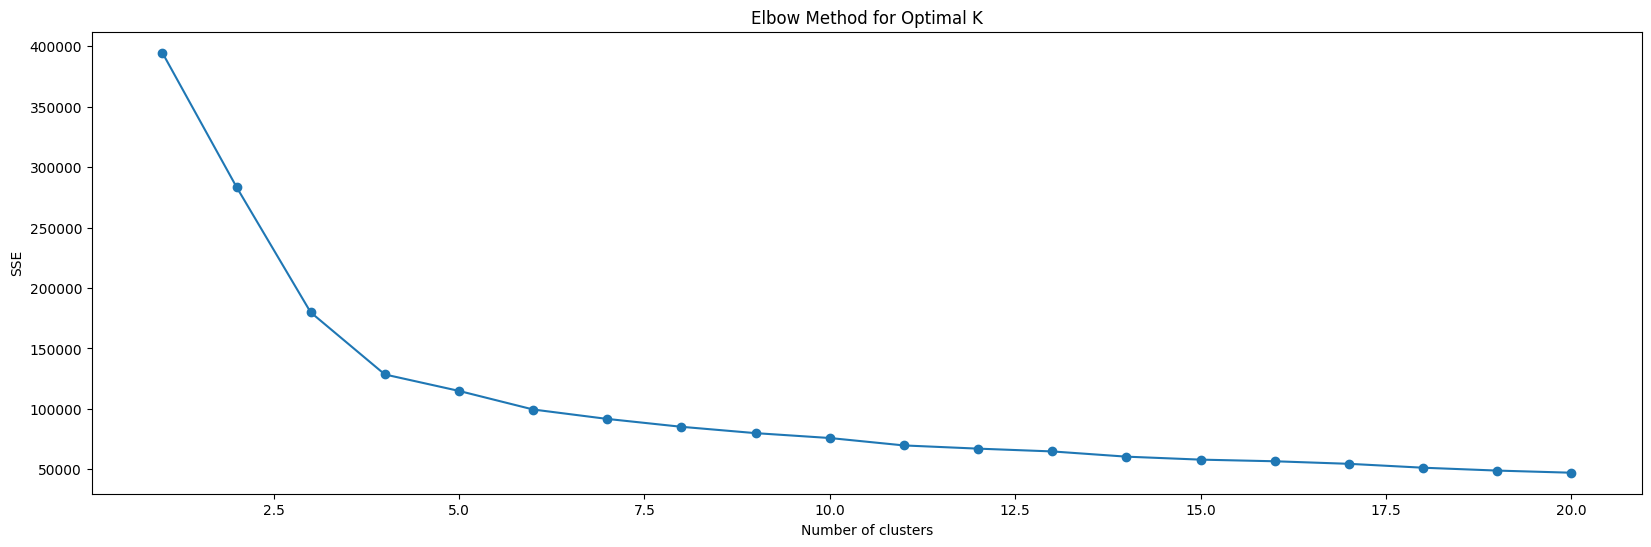

In [2]:
features = data[['Number_of_Dependents', 'Household_Size', 'Budget_Adjustments', 'Life_Expectancy']]

sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(20, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()


Lower SSE == better fitting of model

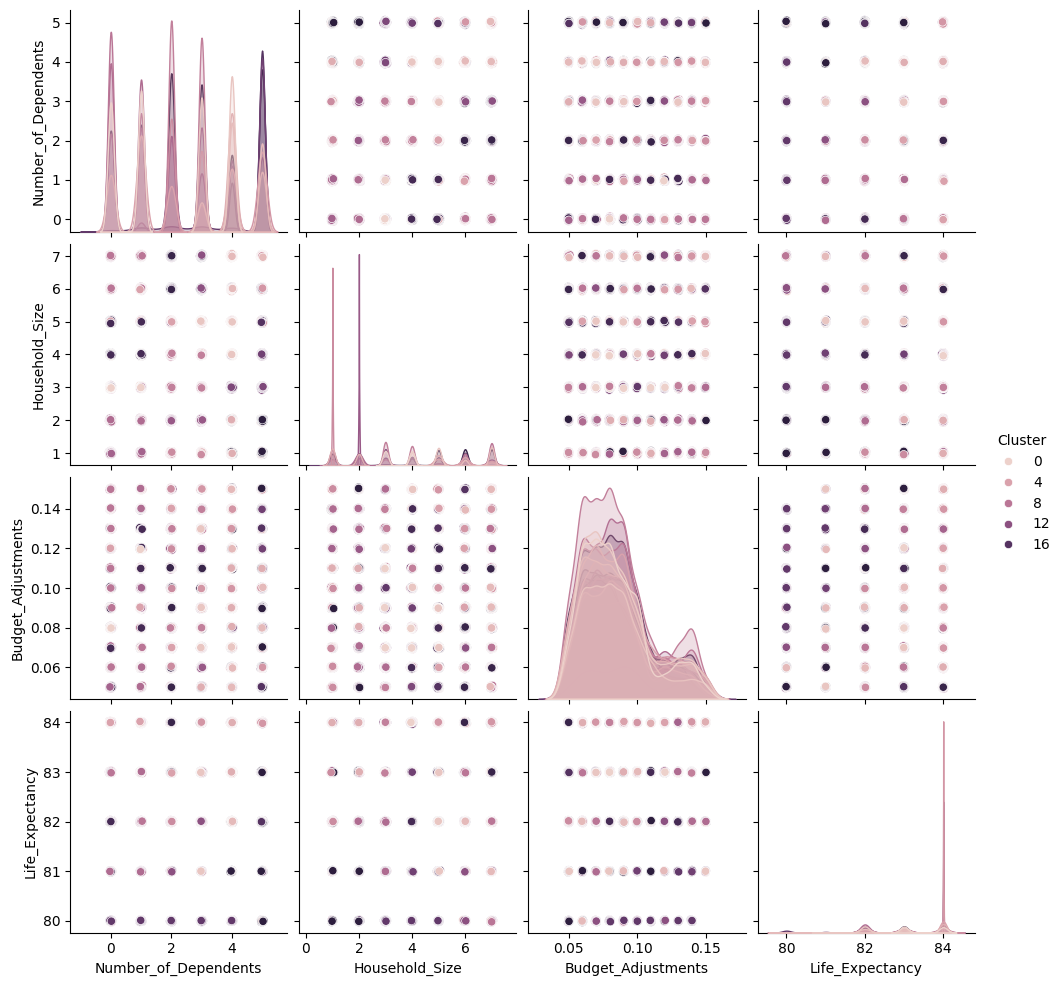

In [3]:

optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

data['Cluster'] = clusters

sns.pairplot(data, vars=['Number_of_Dependents', 'Household_Size', 'Budget_Adjustments', 'Life_Expectancy'], hue='Cluster')
plt.show()

##### silhouette score ranges from -1 (bad clustering) to +1 (good clustering). A value near 0 indicates overlapping clusters.

In [4]:
sil_score = silhouette_score(features, clusters)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.2921346716482058


In [5]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
[[5.22192949e-01 3.49337653e+00 8.37438345e-02 8.34715646e+01]
 [3.53705395e+00 4.57166308e+00 8.47624145e-02 8.23994701e+01]
 [4.44785199e+00 6.76655916e+00 8.37053780e-02 8.22396975e+01]
 [4.14707326e+00 1.40472206e+00 8.46417770e-02 8.37086376e+01]
 [9.43904676e-01 5.66135938e+00 8.56592987e-02 8.37788398e+01]
 [4.31217568e+00 5.85524047e+00 8.66905941e-02 8.40001146e+01]
 [2.41745675e+00 9.99560325e-01 8.46272290e-02 8.27816551e+01]
 [2.47859857e+00 3.45287928e+00 8.52558631e-02 8.31048462e+01]
 [3.72057663e-01 6.65476196e+00 8.54470500e-02 8.25950715e+01]
 [4.74628407e-01 1.99571947e+00 8.55360157e-02 8.21633377e+01]
 [5.14666380e-01 1.31158758e+00 8.38471353e-02 8.36504134e+01]
 [2.52882292e+00 1.99988494e+00 8.27553606e-02 8.30427017e+01]
 [2.30092119e+00 6.26442753e+00 8.62174599e-02 8.18039009e+01]
 [4.52924219e+00 3.48177963e+00 8.10305891e-02 8.39999686e+01]
 [4.70699550e+00 3.34401506e+00 8.46023228e-02 8.23903324e+01]
 [2.28579131e+00 3.41995125e+00 9.09

##### Mocking data to do some predictions

In [6]:
new_data = np.array([[3, 4, 1500, 75]])

cluster_prediction = kmeans.predict(new_data)

print(f"The new data point belongs to cluster: {cluster_prediction[0]}")

The new data point belongs to cluster: 15


c:\Users\limji\Documents\Y2S2\OSS project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
